In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import random


In [10]:
def preprocessing(filename):
    tokenized_sentences = []

    with open(filename, encoding="utf-8") as f:
        for line in f:
            # Remove non-alphabetical characters
            line = ''.join(e for e in line if e.isalpha() or e == ' ')

            # Apply white-space tokenization
            line = line.split()
            tokenized_sentences.append(line)
    print(filename[-2:], 'processed')
    return tokenized_sentences

In [12]:
# Preprocess corpora
bg_sent = preprocessing('corpora/corpus.bg')
de_sent = preprocessing('corpora/corpus.de')
el_sent = preprocessing('corpora/corpus.el')
fi_sent = preprocessing('corpora/corpus.fi')
fr_sent = preprocessing('corpora/corpus.fr')
mt_sent = preprocessing('corpora/corpus.mt')

# Create a joint dict with languages as keys
corpus_dic = {}

corpus_dic['bg'] = bg_sent
corpus_dic['de'] = de_sent
corpus_dic['el'] = el_sent
corpus_dic['fi'] = fi_sent
corpus_dic['fr'] = fr_sent
corpus_dic['mt'] = mt_sent

bg processed
de processed
el processed
fi processed
fr processed
mt processed


In [13]:
def joint(corpus_dict):
    '''

    :param corpus_dict: dict, key is a language and value is a corpus represented a nested list where each sublist is a tokenized sentence
    :return joint_lists_dic: dict, key is a language and value is a list of tokens(ignore the sentence boundaries)
    '''

    joint_dic = {}
    for k, v in corpus_dict.items():
        joint_lists = [j for i in v for j in i]
        joint_dic[k] = joint_lists
    return joint_dic

In [14]:
joint_lists_dic = joint(corpus_dic)

# 1.1. Zipfian word distirbution 

In [15]:
def word_freqs(corpus):

    counts = Counter(corpus)
    # Sort by descending word frequency
    return dict(counts.most_common())

In [16]:
# Represent each corpus as a dictionary with words and their frequencies.
bulgarian = word_freqs(joint_lists_dic['bg'])
german = word_freqs(joint_lists_dic['de'])
greek = word_freqs(joint_lists_dic['el'])
finnish = word_freqs(joint_lists_dic['fi'])
french = word_freqs(joint_lists_dic['fr'])
maltese = word_freqs(joint_lists_dic['mt'])

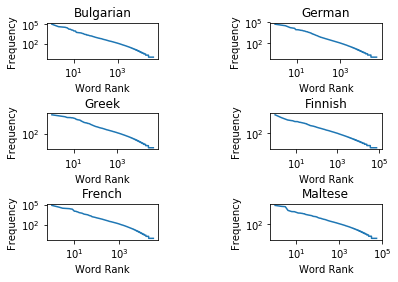

In [17]:
# Plot the log curves where x-axis represents the word rank and the y-axis represents the word frequency in the corpus.
plt.figure(1)
# bulgarian
plt.subplot(321)
plt.loglog(list(range(1, len(bulgarian) + 1)), list(bulgarian.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Bulgarian')

# german
plt.subplot(322)
plt.loglog(list(range(1, len(german) + 1)), list(german.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('German')

# greek
plt.subplot(323)
plt.loglog(list(range(1, len(greek) + 1)), list(greek.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Greek')

# finnish
plt.subplot(324)
plt.loglog(list(range(1, len(finnish) + 1)), list(finnish.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Finnish')

# french
plt.subplot(325)
plt.loglog(list(range(1, len(french) + 1)), list(french.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('French')

# maltese
plt.subplot(326)
plt.loglog(list(range(1, len(maltese) + 1)), list(maltese.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Maltese')

plt.subplots_adjust(wspace=1, hspace=1.5)
plt.savefig('words_frequencies', format='eps')
plt.show()

# 1.2. The Principal of Least Effort

In [18]:
def least_effort(dic):
    '''
    Compare the arithmetic mean of word lengths (measured by the number of characters)
    of the top 10 most frequent words against a random sample of 10 words that occur only once in the corpus.

    :param dic: dict, containing the words and their frequency in the descending order
    :return freq_mean, random_mean: int, defines the arithmetic mean of the word length

    '''
    # Generates a list of words that occur only once
    least_freq = [k for k, v in dic.items() if int(v) == 1]
    # Generates a list of the most frequent words in the corpus
    top_freq = list(dic.keys())[:10]

    # Initialize a counter that sums the length of all words in the list
    freq_sum = 0
    for word in top_freq:
        freq_sum += len(word)
    freq_mean = freq_sum / len(top_freq)

    random_words = random.sample(least_freq, 10)
    random_sum = 0
    for word in random_words:
        random_sum += len(word)
    random_mean = random_sum / len(random_words)

    return freq_mean, random_mean

In [20]:
# Calculate the arithmetic mean of word lengths: 10 most frequent words vs. 10 random words that occur only once.

bg_freq_mean, bg_random_mean = least_effort(bulgarian)
german_freq_mean, bg_random_mean = least_effort(german)
greek_freq_mean, bg_random_mean = least_effort(greek)
finnish_freq_mean, bg_random_mean = least_effort(finnish)
french_freq_mean, bg_random_mean = least_effort(french)
maltese_freq_mean, bg_random_mean = least_effort(maltese)

In [22]:
# #Plot the table
    
avg_wordlengths = {'Bulgarian': list(least_effort(bulgarian)), 'German': list(least_effort(german)), 'Greek': list(least_effort(greek)), 'Finnish': list(least_effort(finnish)), 'French': list(least_effort(french)), 'Maltese': list(least_effort(maltese))}
print('Average Word Lengths of Most Frequent Words vs Random Words')
data = avg_wordlengths
print(pd.DataFrame(data))

Average Word Lengths of Most Frequent Words vs Random Words
   Bulgarian  German  Greek  Finnish  French  Maltese
0        1.6     3.0    2.7      4.5     2.1      3.1
1        9.4    14.8   12.0     14.8     8.7      8.7


# 1.3. Zipfian character distribution

In [6]:
def char_freqs(corpus):
    # Exclude white-space
    corp = "".join(corpus)
    counts = Counter(corp)
    return dict(counts.most_common())

In [7]:
def plotting(corpus):
    '''
    Plot the table.
    '''
    char_list = [x[0] for x in list(corpus.items())[:10]]
    rel_freq = [v / sum(corpus.values()) for v in list(corpus.values())[:10]]
    return char_list, rel_freq

bg processed
de processed
el processed
fi processed
fr processed
mt processed


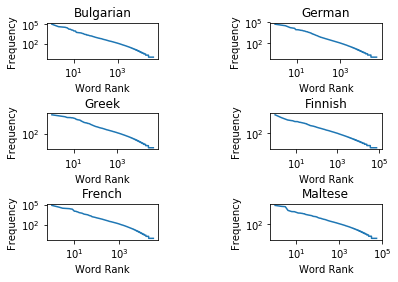

Average Word Lengths of Most Frequent Words vs Random Words
   Bulgarian  German  Greek  Finnish  French  Maltese
0        1.6     3.0    2.7      4.5     2.1      3.1
1       10.7    14.0    9.8     12.1    11.8      9.5


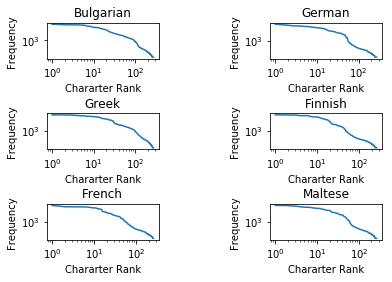

10 most frequent letters in descending order by language
  Bulgarian  Rel Freq
0         а  0.112874
1         и  0.090045
2         е  0.086759
3         о  0.085420
4         н  0.078873
5         т  0.074931
6         р  0.052149
7         с  0.046080
8         в  0.042197
9         л  0.030094
  German  Rel Freq
0      e  0.152147
1      n  0.099032
2      i  0.073047
3      r  0.072438
4      s  0.059699
5      t  0.057428
6      d  0.047368
7      a  0.043793
8      u  0.039078
9      h  0.033394
  Greek  Rel Freq
0     α  0.084483
1     ο  0.077917
2     τ  0.077149
3     ι  0.063761
4     ε  0.057009
5     ν  0.056128
6     ρ  0.045705
7     σ  0.045404
8     η  0.042845
9     π  0.039347
  Finnish  Rel Freq
0       a  0.112151
1       t  0.104702
2       i  0.099518
3       s  0.080994
4       e  0.080989
5       n  0.080642
6       o  0.057281
7       l  0.049662
8       u  0.047984
9       k  0.045367
  French  Rel Freq
0      e  0.132688
1      n  0.076254
2      s  0.07419

In [8]:
# Represent each corpus as a dictionary with characters and their frequencies.
    
bulgarian_char_counts = char_freqs(joint_lists_dic['bg'])
german_char_counts = char_freqs(joint_lists_dic['de'])
greek_char_counts = char_freqs(joint_lists_dic['el'])
finnish_char_counts = char_freqs(joint_lists_dic['fi'])
french_char_counts = char_freqs(joint_lists_dic['fr'])
maltese_char_counts = char_freqs(joint_lists_dic['mt'])


In [ ]:

# Plot the log curves where x-axis represents the word rank and the y-axis represents the word frequency in the corpus.

plt.figure(1)

# bulgarian
plt.subplot(321)
plt.loglog(list(range(1, len(bulgarian_char_counts) + 1)), list(bulgarian_char_counts.values()))
plt.xlabel('Chararter Rank')
plt.ylabel('Frequency')
plt.title('Bulgarian')

# german
plt.subplot(322)
plt.loglog(list(range(1, len(german_char_counts) + 1)), list(german_char_counts.values()))
plt.xlabel('Chararter Rank')
plt.ylabel('Frequency')
plt.title('German')

# greek
plt.subplot(323)
plt.loglog(list(range(1, len(greek_char_counts) + 1)), list(greek_char_counts.values()))
plt.xlabel('Chararter Rank')
plt.ylabel('Frequency')
plt.title('Greek')

# finnish
plt.subplot(324)
plt.loglog(list(range(1, len(finnish_char_counts) + 1)), list(finnish_char_counts.values()))
plt.xlabel('Chararter Rank')
plt.ylabel('Frequency')
plt.title('Finnish')

# french
plt.subplot(325)
plt.loglog(list(range(1, len(french_char_counts) + 1)), list(french_char_counts.values()))
plt.xlabel('Chararter Rank')
plt.ylabel('Frequency')
plt.title('French')

# maltese
plt.subplot(326)
plt.loglog(list(range(1, len(maltese_char_counts) + 1)), list(maltese_char_counts.values()))
plt.xlabel('Chararter Rank')
plt.ylabel('Frequency')
plt.title('Maltese')

plt.subplots_adjust(wspace = 1, hspace = 1.5)
plt.savefig('char_frequencies', format='eps')
plt.show()


In [ ]:
# Computes the list of characters and their relative frequencies

bg_char_list, bg_char_rel_freq = plotting(bulgarian_char_counts)
de_char_list, de_char_rel_freq = plotting(german_char_counts)
el_char_list, el_char_rel_freq = plotting(greek_char_counts)
fi_char_list, fi_char_rel_freq = plotting(finnish_char_counts)
fr_char_list, fr_char_rel_freq = plotting(french_char_counts)
mt_char_list, mt_char_rel_freq = plotting(maltese_char_counts)

In [ ]:
# Plot the table
print('10 most frequent letters in descending order by language')

bg = {'Bulgarian': bg_char_list, 'Rel Freq': bg_char_rel_freq}
print(pd.DataFrame(bg))

de = {'German': de_char_list, 'Rel Freq': de_char_rel_freq}
print(pd.DataFrame(de))

el = {'Greek': el_char_list, 'Rel Freq': el_char_rel_freq}
print(pd.DataFrame(el))

fi = {'Finnish': fi_char_list, 'Rel Freq': fi_char_rel_freq}
print(pd.DataFrame(fi))

fr = {'French': fr_char_list, 'Rel Freq': fr_char_rel_freq}
print(pd.DataFrame(fr))

mt = {'Maltese': mt_char_list, 'Rel Freq': mt_char_rel_freq}
print(pd.DataFrame(mt))